# Importing necessary library

In [1]:
# Importing necessary library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from matplotlib import rc_context, rcParams
import warnings
warnings.filterwarnings('ignore')

# Importing The Data

In [2]:
df_train = pd.read_csv('/Users/sahreenhaider/Downloads/house-prices-advanced-regression-techniques/train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Checking for null values in the dataset

df_train.isna().sum()[df_train.isnull().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [5]:
# shape of the dateset

print(df_train.shape)

(1460, 81)


# features which are most corelated

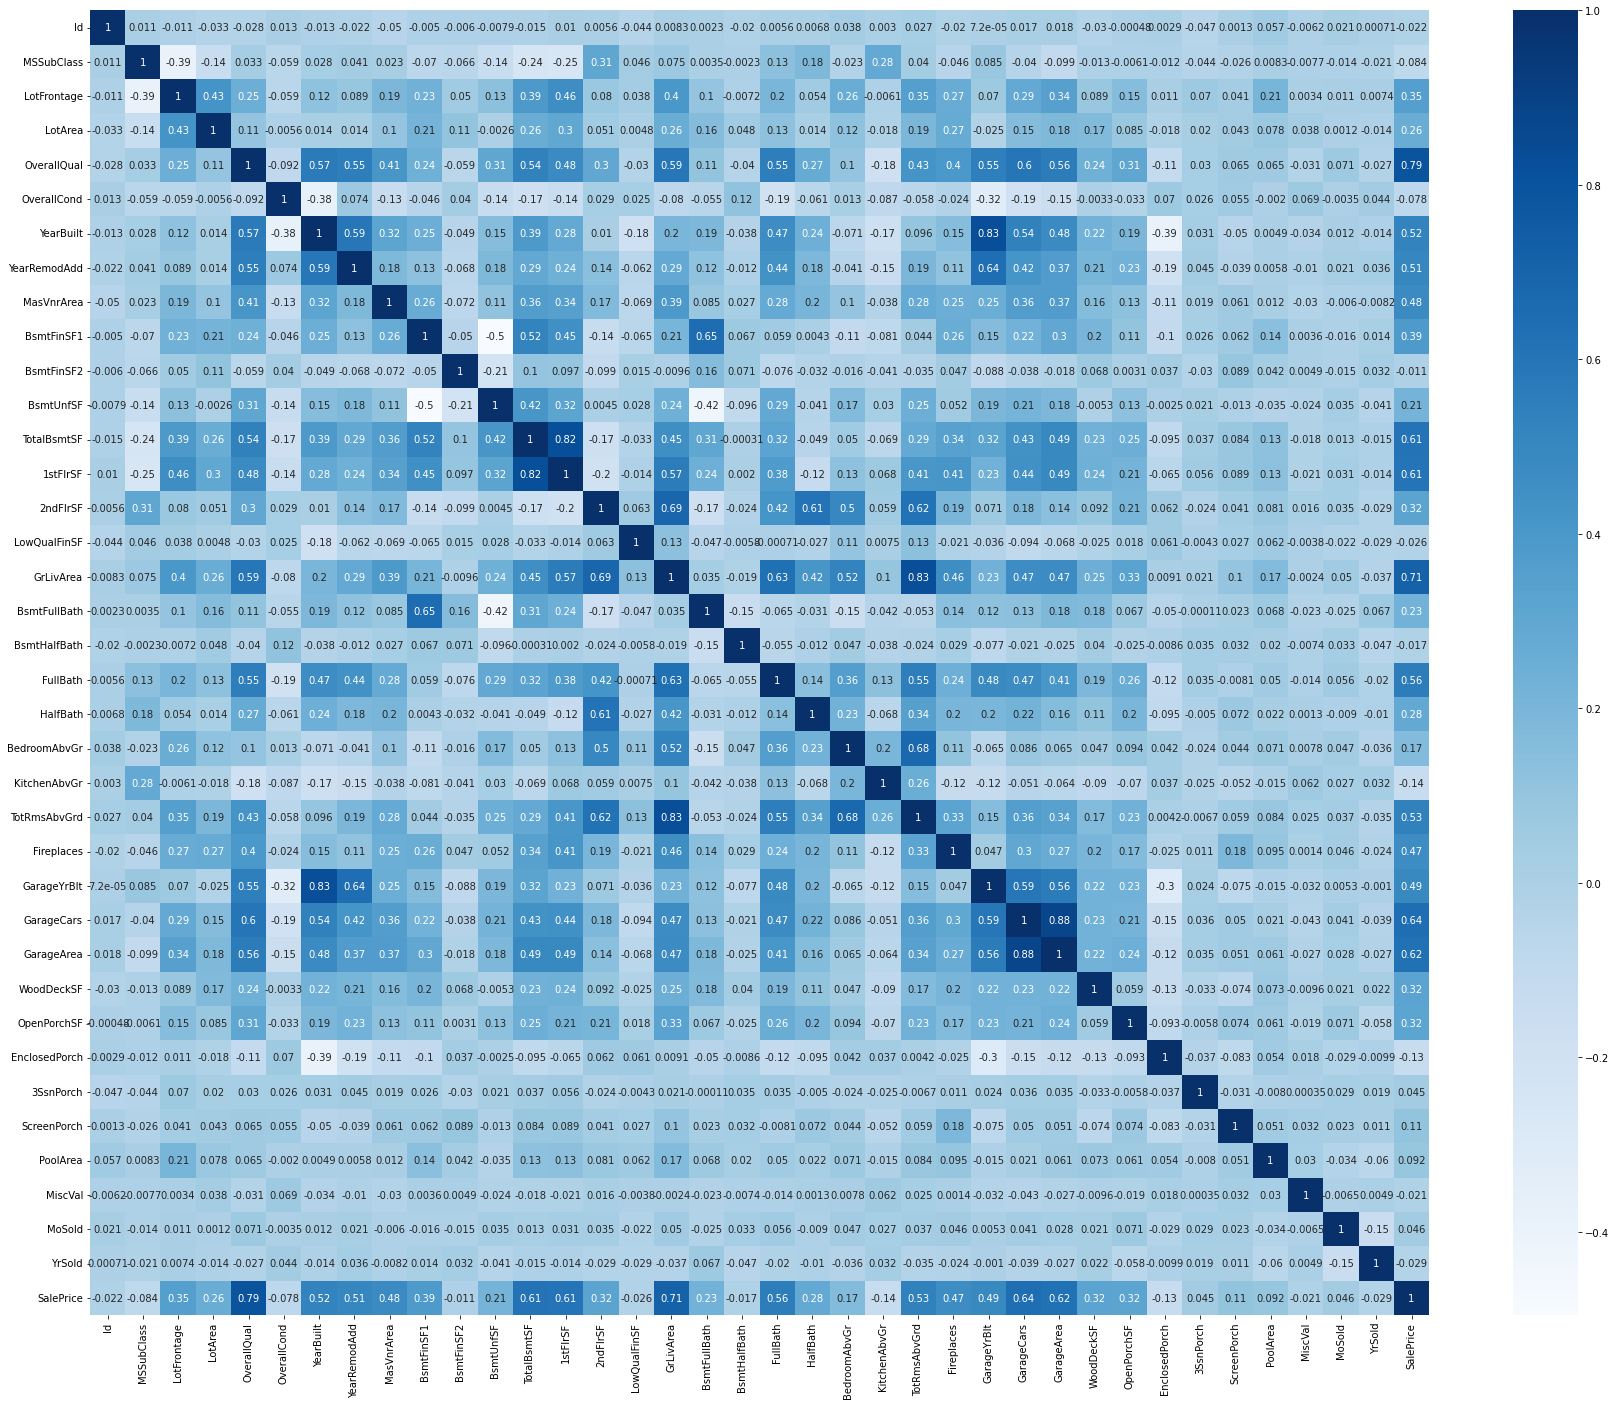

In [6]:
with rc_context({'figure.facecolor':'white'}):
    plt.figure(figsize=(30,24))
    sns.heatmap(df_train.corr(),annot=True, cmap='Blues')

In [7]:
df_train_corr = df_train.corr()

In [8]:
highest_correlation_features = df_train_corr.index[abs(df_train_corr["SalePrice"])>0.6]
highest_correlation_features 

Index(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars',
       'GarageArea', 'SalePrice'],
      dtype='object')

In [9]:
df_train[highest_correlation_features].corr()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,SalePrice
OverallQual,1.000000,0.537808,0.476224,0.593007,0.600671,0.562022,0.790982
TotalBsmtSF,0.537808,1.000000,0.819530,0.454868,0.434585,0.486665,0.613581
1stFlrSF,0.476224,0.819530,1.000000,0.566024,0.439317,0.489782,0.605852
GrLivArea,0.593007,0.454868,0.566024,1.000000,0.467247,0.468997,0.708624
GarageCars,0.600671,0.434585,0.439317,0.467247,1.000000,0.882475,0.640409
GarageArea,0.562022,0.486665,0.489782,0.468997,0.882475,1.000000,0.623431
SalePrice,0.790982,0.613581,0.605852,0.708624,0.640409,0.623431,1.000000


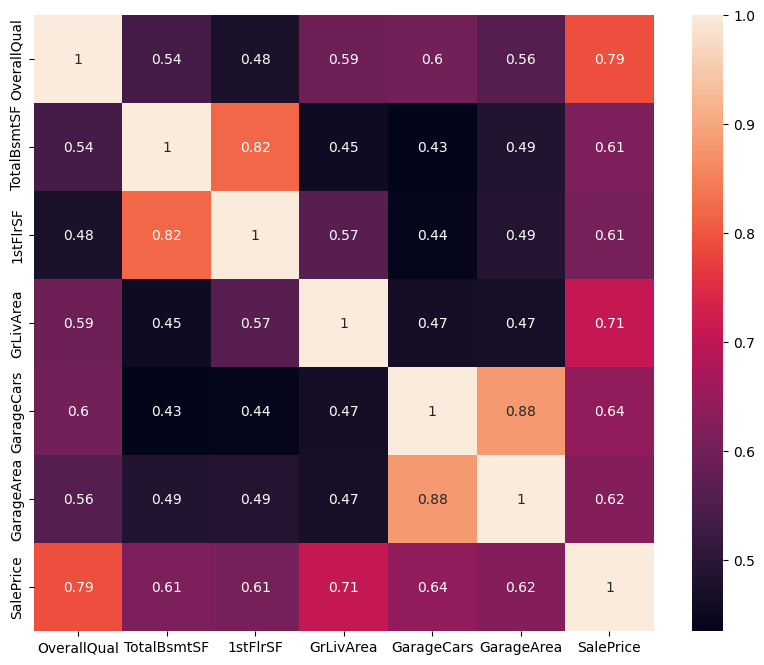

In [10]:
with rc_context({'figure.facecolor':'white'}):
    plt.figure(figsize=(10,8))
    sns.heatmap(df_train[highest_correlation_features].corr(), annot=True)

In [11]:
df_train[highest_correlation_features].isnull().sum()

OverallQual    0
TotalBsmtSF    0
1stFlrSF       0
GrLivArea      0
GarageCars     0
GarageArea     0
SalePrice      0
dtype: int64

In [12]:
# Сategorical features

cat_features = df_train.dtypes[df_train.dtypes == 'object'].index
df_train[cat_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [13]:
df_train[cat_features].isnull().sum()[df_train[cat_features].isnull().sum() > 0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [14]:
reso = df_train[cat_features].isnull().sum()[df_train[cat_features].isnull().sum() > 0]/len(df_train) * 100 

### Delete all values where proc NAN more then 10%

In [15]:
categorical_value = reso[reso < 10].index
df_train[categorical_value].head()

,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageFinish,GarageQual,GarageCond
0,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA
1,None,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,RFn,TA,TA
2,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA
3,None,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,Unf,TA,TA
4,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA


In [16]:
for col in df_train[categorical_value]:
    df_train[col] = df_train[col].fillna(df_train[col].mode()[0])

In [17]:
df_train[categorical_value].isna().sum()

MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [18]:
df_new_train = pd.concat([df_train[categorical_value], df_train[highest_correlation_features]], axis=1)
df_new_train.head(3)

,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageFinish,GarageQual,GarageCond,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,SalePrice
0,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA,7,856,856,1710,2,548,208500
1,None,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,RFn,TA,TA,6,1262,1262,1262,2,460,181500
2,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA,7,920,920,1786,2,608,223500


In [19]:
# Use get_dummies to convert categorical features

df_new_train = pd.get_dummies(df_new_train)
df_new_train.head(3) # 59

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,SalePrice,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,...,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA
0,7,856,856,1710,2,548,208500,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,6,1262,1262,1262,2,460,181500,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,7,920,920,1786,2,608,223500,0,1,0,...,0,0,0,0,1,0,0,0,0,1


# Train test split

In [20]:
y = df_new_train['SalePrice']
X = df_new_train.drop(['SalePrice'], axis=1)
X.shape, y.shape

((1460, 58), (1460,))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
X_train.shape, y_train.shape

((1022, 58), (1022,))

In [23]:
X_test.shape, y_test.shape

((438, 58), (438,))

# Linear Regression

In [24]:
linear_model = LinearRegression()
linear_model_fit = linear_model.fit(X_train, y_train)

In [25]:
y_pred = linear_model_fit.predict(X_test)

In [26]:
print(y_pred[:10])

[148270.01128526 326687.77673099 116052.91167633 176804.1962309
 343962.22112425  59330.75281612 207598.99774426 179844.24483575
  71463.37238245 121616.9073163 ]


# Quality metrics RMSE MAE R2

In [27]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('R2:', np.round(metrics.r2_score(y_test, y_pred), 2))

RMSE: 34768.24501046982
MAE: 23387.92624542465
R2: 0.83
